# **History/Verlauf des Trainings darstellen**

In [2]:
#Hilfscode zum finden meines Arbeitsverzeichnis und der vorhanden Dateien
import os
print("Aktuelles Arbeitsverzeichnis:", os.getcwd())

input_dir = '/kaggle/input/'

for root, dirs, files in os.walk(input_dir):
    print(f"Verzeichnis: {root}")
    print(f"Unterordner: {dirs}")
    print(f"Dateien: {files}")
    print('---')

Aktuelles Arbeitsverzeichnis: /kaggle/working
Verzeichnis: /kaggle/input/
Unterordner: ['modelle']
Dateien: []
---
Verzeichnis: /kaggle/input/modelle
Unterordner: ['model_1Hour_GRU32x2_gradclip_RedPl_seq336_B128', 'model_LSTM64_gradclip_RedPl', 'model_1Hour_LSTM64_gradclip_RedPl_seq336', 'model_GRU64', 'model_LSTM32x2_gradclip_RedPl_seq336_B128', 'model_GRU64_gradclip_RedPl_seq672', 'model_GRU32x2_gradclip_RedPl_seq336_B128', 'model_LSTM64', 'model_LSTM64_gradclip_RedPl_seq672', 'model_1Hour_GRU64_gradclip_RedPl_seq336', 'model_GRU64_gradclip_RedPl', 'model_1Hour_LSTM32x2_gradclip_RedPl_seq336_B128']
Dateien: []
---
Verzeichnis: /kaggle/input/modelle/model_1Hour_GRU32x2_gradclip_RedPl_seq336_B128
Unterordner: []
Dateien: ['model_1Hour_GRU32x2_gradclip_RedPl_seq336_B128-epoch-20.keras', 'model_1Hour_GRU32x2_gradclip_RedPl_seq336_B128-epoch-06.keras', 'model_1Hour_GRU32x2_gradclip_RedPl_seq336_B128-epoch-61.keras', 'model_1Hour_GRU32x2_gradclip_RedPl_seq336_B128-epoch-21.keras', 'model_1

In [3]:
#Hilfscode zum finden der .pkl-Dateien (History-Dateien der Modelle)
import os

input_dir = '/kaggle/input/modelle'
keyword = 'LSTM64'  # Suchwort zum eingrenzen der .pkl-Dateien

filtered_pkl_files = []
for root, dirs, files in os.walk(input_dir):
    for file in files:
        if file.endswith('.pkl') and keyword in file:
            filtered_pkl_files.append(os.path.join(root, file))

print(f"Gefundene .pkl-Dateien mit '{keyword}':")
for pf in filtered_pkl_files:
    print(pf)

print(f"\nGesamtzahl der gefundenen .pkl-Dateien mit '{keyword}': {len(filtered_pkl_files)}")


Gefundene .pkl-Dateien mit 'LSTM64':
/kaggle/input/modelle/model_LSTM64_gradclip_RedPl/model_LSTM64_gradclip_RedPl_history.pkl
/kaggle/input/modelle/model_1Hour_LSTM64_gradclip_RedPl_seq336/model_1Hour_LSTM64_gradclip_RedPl_seq336_history.pkl
/kaggle/input/modelle/model_LSTM32x2_gradclip_RedPl_seq336_B128/model_LSTM64x2_gradclip_RedPl_seq672_B128_history.pkl
/kaggle/input/modelle/model_LSTM64/model_LSTM64_history.pkl
/kaggle/input/modelle/model_LSTM64_gradclip_RedPl_seq672/model_LSTM64_gradclip_RedPl_seq672_history.pkl

Gesamtzahl der gefundenen .pkl-Dateien mit 'LSTM64': 5


History erfolgreich geladen!


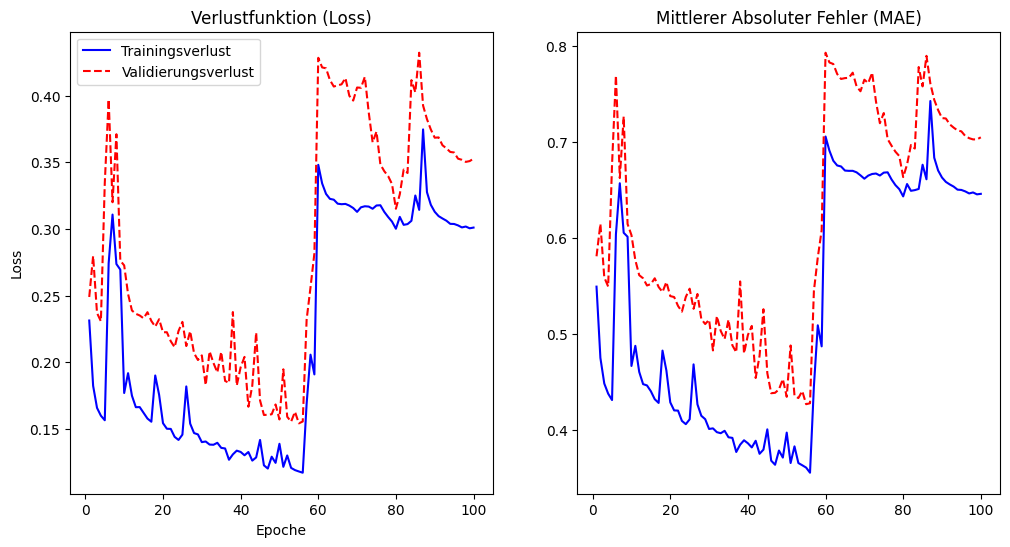

In [7]:
#Darstellung mit  Matplot

import pickle
import os
import matplotlib.pyplot as plt

# 1. History laden
history_path = '/kaggle/input/modelle/model_LSTM64/model_LSTM64_history.pkl'


if os.path.exists(history_path):
    with open(history_path, 'rb') as file:
        loaded_history = pickle.load(file)
    print("History erfolgreich geladen!")
    
    # 2. Plots erstellen
    loss = loaded_history['loss']
    val_loss = loaded_history['val_loss']
    mae = loaded_history['mae']
    val_mae = loaded_history['val_mae']
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(12, 6))

    # Loss-Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'b-', label='Trainingsverlust')
    plt.plot(epochs, val_loss, 'r--', label='Validierungsverlust')
    plt.title('Verlustfunktion (Loss)')
    plt.xlabel('Epoche')
    plt.ylabel('Loss')
    plt.legend()

    # MAE-Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, mae, 'b-', label='Trainings-MAE')
    plt.plot(epochs, val_mae, 'r--', label='Validierungs-MAE')
    plt.title('Mittlerer Absoluter Fehler (MAE)')


/kaggle/working/modelle_vergleich.png

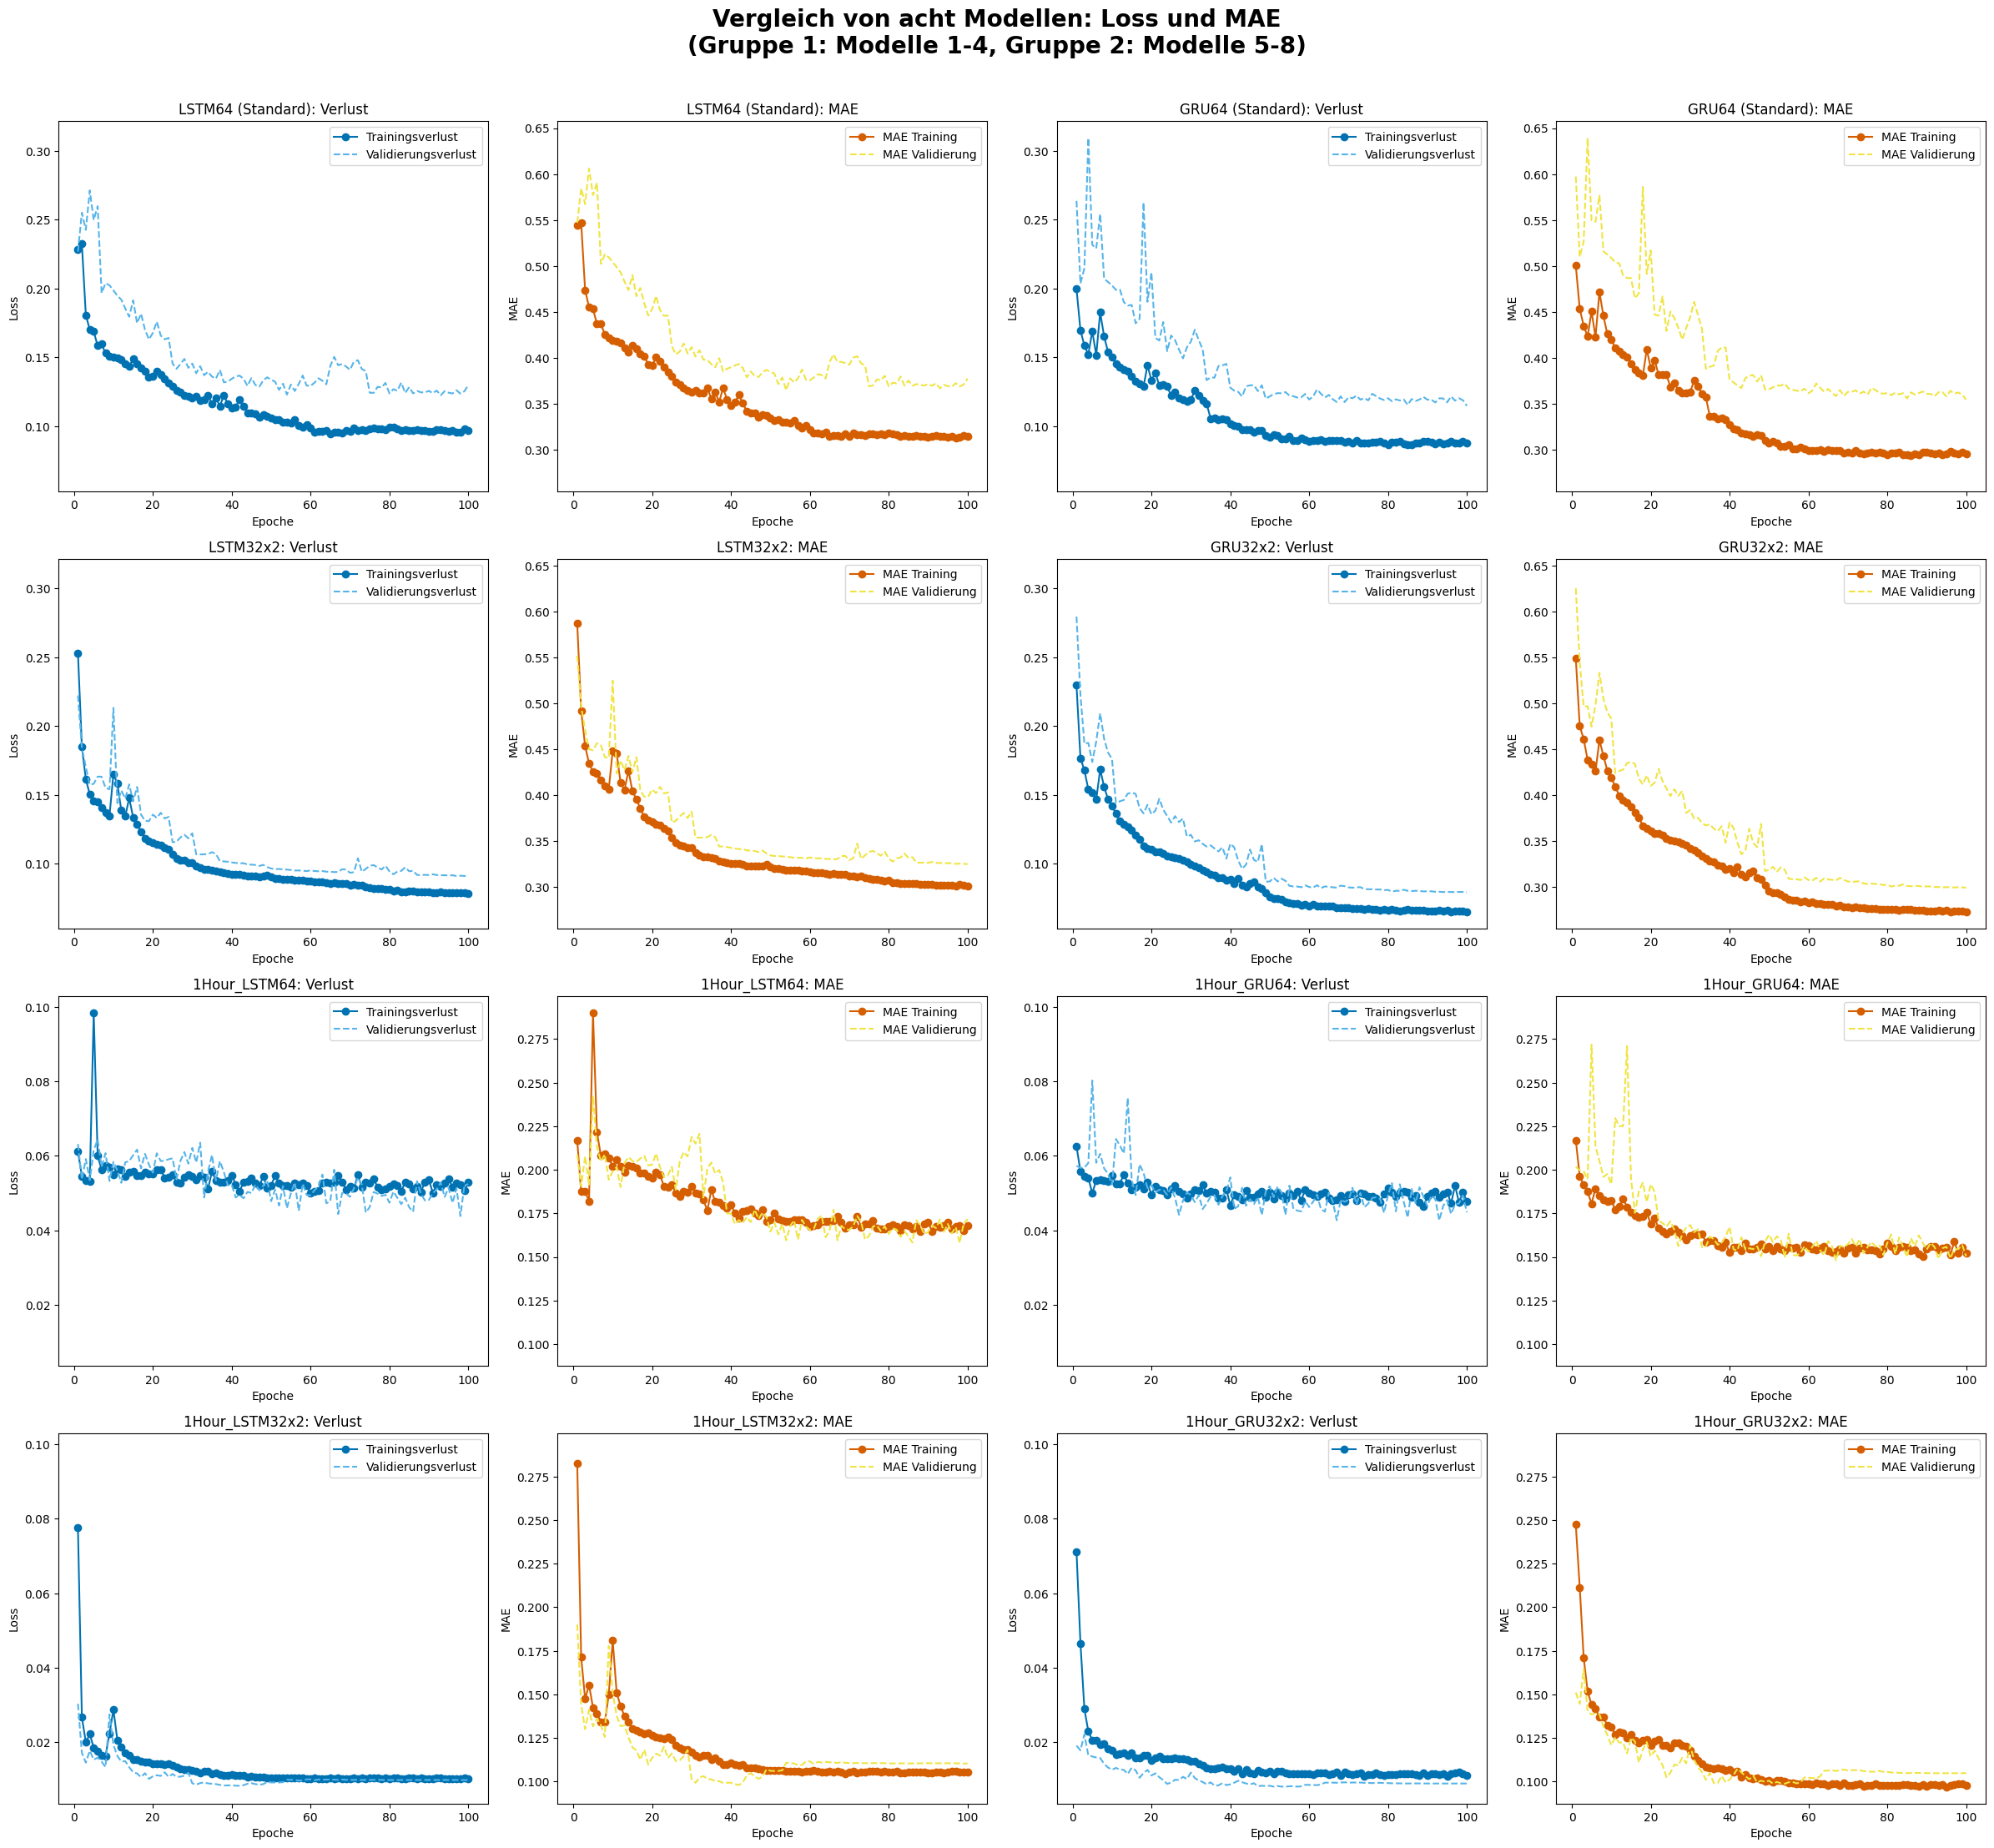

In [6]:
#Gleichzetige Darstellung der 8 Modelle mit Matplot  (verwendete Grafik 14 in Anhang)

import matplotlib.pyplot as plt
import os
import pickle

# Farbschema für bessere Lesbarkeit und Barrierefreiheit
color_train_loss = "#0072B2"    # Blau
color_val_loss   = "#56B4E9"    # Hellblau
color_train_mae  = "#D55E00"    # Orange
color_val_mae    = "#F0E442"    # Gelb

history_paths = [
    "/kaggle/input/modelle/model_LSTM64_gradclip_RedPl/model_LSTM64_gradclip_RedPl_history.pkl",
    "/kaggle/input/modelle/model_GRU64_gradclip_RedPl/model_GRU64_gradclip_RedPl_history.pkl",
    "/kaggle/input/modelle/model_LSTM32x2_gradclip_RedPl_seq336_B128/model_LSTM64x2_gradclip_RedPl_seq672_B128_history.pkl",
    "/kaggle/input/modelle/model_GRU32x2_gradclip_RedPl_seq336_B128/model_GRU32x2_gradclip_RedPl_seq336_B128_history.pkl",
    "/kaggle/input/modelle/model_1Hour_LSTM64_gradclip_RedPl_seq336/model_1Hour_LSTM64_gradclip_RedPl_seq336_history.pkl",
    "/kaggle/input/modelle/model_1Hour_GRU64_gradclip_RedPl_seq336/model_1Hour_GRU64_gradclip_RedPl_seq336_history.pkl",
    "/kaggle/input/modelle/model_1Hour_LSTM32x2_gradclip_RedPl_seq336_B128/model_1Hour_LSTM32x2_gradclip_RedPl_seq336_B128_history.pkl",
    "/kaggle/input/modelle/model_1Hour_GRU32x2_gradclip_RedPl_seq336_B128/model_1Hour_GRU32x2_gradclip_RedPl_seq336_B128_history.pkl"
]

model_titles = [
    "LSTM64 (Standard)",
    "GRU64 (Standard)",
    "LSTM32x2",
    "GRU32x2",
    "1Hour_LSTM64",
    "1Hour_GRU64",
    "1Hour_LSTM32x2",
    "1Hour_GRU32x2"
]

def load_history(path):
    if not os.path.exists(path):
        print(f"❌ Datei nicht gefunden: {path}")
        return None
    with open(path, 'rb') as file:
        return pickle.load(file)

history_dicts = [load_history(p) for p in history_paths]

if any(h is None for h in history_dicts):
    print("Mindestens eine History-Datei konnte nicht geladen werden. Bitte prüfe die Pfade.")
else:
    epochs = [range(1, len(h["loss"]) + 1) for h in history_dicts]

    # Skalen für Gruppe 1 (erste vier Modelle)
    all_mae_1, all_loss_1 = [], []
    for h in history_dicts[:4]:
        all_mae_1.extend(h["mae"])
        all_mae_1.extend(h["val_mae"])
        all_loss_1.extend(h["loss"])
        all_loss_1.extend(h["val_loss"])
    min_mae_1, max_mae_1 = min(all_mae_1), max(all_mae_1)
    margin_mae_1 = 0.05 * (max_mae_1 - min_mae_1)
    min_mae_1 -= margin_mae_1
    max_mae_1 += margin_mae_1
    min_loss_1, max_loss_1 = min(all_loss_1), max(all_loss_1)
    margin_loss_1 = 0.05 * (max_loss_1 - min_loss_1)
    min_loss_1 -= margin_loss_1
    max_loss_1 += margin_loss_1

    # Skalen für Gruppe 2 (letzte vier Modelle)
    all_mae_2, all_loss_2 = [], []
    for h in history_dicts[4:]:
        all_mae_2.extend(h["mae"])
        all_mae_2.extend(h["val_mae"])
        all_loss_2.extend(h["loss"])
        all_loss_2.extend(h["val_loss"])
    min_mae_2, max_mae_2 = min(all_mae_2), max(all_mae_2)
    margin_mae_2 = 0.05 * (max_mae_2 - min_mae_2)
    min_mae_2 -= margin_mae_2
    max_mae_2 += margin_mae_2
    min_loss_2, max_loss_2 = min(all_loss_2), max(all_loss_2)
    margin_loss_2 = 0.05 * (max_loss_2 - min_loss_2)
    min_loss_2 -= margin_loss_2
    max_loss_2 += margin_loss_2

    plt.figure(figsize=(24, 22))

    for i in range(8):
        # Wähle die Skalen je nach Gruppe
        if i < 4:
            min_loss, max_loss = min_loss_1, max_loss_1
            min_mae, max_mae = min_mae_1, max_mae_1
        else:
            min_loss, max_loss = min_loss_2, max_loss_2
            min_mae, max_mae = min_mae_2, max_mae_2

        # Loss-Plot
        plt.subplot(4, 4, 2*i + 1)
        plt.plot(epochs[i], history_dicts[i]["loss"], "o-", color=color_train_loss, label="Trainingsverlust")
        plt.plot(epochs[i], history_dicts[i]["val_loss"], "--", color=color_val_loss, label="Validierungsverlust")
        plt.title(f"{model_titles[i]}: Verlust")
        plt.xlabel("Epoche")
        plt.ylabel("Loss")
        plt.ylim(min_loss, max_loss)
        plt.legend()
        # MAE-Plot
        plt.subplot(4, 4, 2*i + 2)
        plt.plot(epochs[i], history_dicts[i]["mae"], "o-", color=color_train_mae, label="MAE Training")
        plt.plot(epochs[i], history_dicts[i]["val_mae"], "--", color=color_val_mae, label="MAE Validierung")
        plt.title(f"{model_titles[i]}: MAE")
        plt.xlabel("Epoche")
        plt.ylabel("MAE")
        plt.ylim(min_mae, max_mae)
        plt.legend()

    plt.figtext(0.5, 0.98, "Vergleich von acht Modellen: Loss und MAE\n(Gruppe 1: Modelle 1-4, Gruppe 2: Modelle 5-8)", ha="center", fontsize=20, weight="bold")
    plt.subplots_adjust(hspace=0.7, wspace=0.4)
    plt.tight_layout(rect=[0, 0, 1, 0.96])

    plt.savefig('modelle_vergleich.png', dpi=300, bbox_inches='tight')
    from IPython.display import FileLink, display
    display(FileLink('modelle_vergleich.png'))

    
    plt.show()


In [13]:
#Hilfscode zum finden der Epoche für jedes Modell, in der das beste MAE Ergebnis für den Validations Datensatz aufgetreten ist (Also das beste Modell im Training)

import pandas as pd
import pickle
import os
import numpy as np

def analyze_best_epochs_with_params(base_path='/kaggle/input/modelle'):
    results = []
    for root, dirs, files in os.walk(base_path):
        for file in files:
            if file.endswith('.pkl'):
                model_name = os.path.basename(root)
                pkl_path = os.path.join(root, file)
                try:
                    if os.path.getsize(pkl_path) == 0:
                        continue
                    with open(pkl_path, 'rb') as f:
                        history = pickle.load(f)
                    if not isinstance(history, dict):
                        continue
                    # Beste Epoche für Validation MAE
                    if 'val_mae' in history and len(history['val_mae']) > 0:
                        val_mae_arr = np.array(history['val_mae'])
                        best_mae_epoch = int(np.argmin(val_mae_arr))
                        best_val_mae = float(val_mae_arr[best_mae_epoch])
                        # Auch Loss für diese Epoche
                        best_val_loss = float(history['val_loss'][best_mae_epoch]) if 'val_loss' in history else np.nan
                        # Auch Training-Werte für diese Epoche
                        train_mae = float(history['mae'][best_mae_epoch]) if 'mae' in history else np.nan
                        train_loss = float(history['loss'][best_mae_epoch]) if 'loss' in history else np.nan
                        # Parameter, falls vorhanden
                        params = history.get('params') or history.get('hyperparameters') or history.get('config') or {}
                        params_str = "; ".join([f"{k}={v}" for k, v in params.items()]) if isinstance(params, dict) else str(params)
                        results.append({
                            'Modell': model_name,
                            'Beste Epoche': best_mae_epoch + 1,
                            'Val_MAE': best_val_mae,
                            'Val_Loss': best_val_loss,
                            'Train_MAE': train_mae,
                            'Train_Loss': train_loss,
                            'Parameter': params_str
                        })
                except Exception as e:
                    print(f"Fehler bei {pkl_path}: {e}")
    return results

def main():
    print("Starte Analyse der besten Epochen und Modell-Parameter ...")
    results = analyze_best_epochs_with_params()
    if not results:
        print("Keine gültigen History-Dateien gefunden!")
        return
    df = pd.DataFrame(results)
    # Nach bestem Val_MAE sortieren
    df = df.sort_values('Val_MAE')
    
    # Übersichtliche Pandas-Tabelle im Notebook
    try:
        from IPython.display import display
        display(df)
    except ImportError:
        print(df.to_string(index=False, float_format='%.6f', max_colwidth=80))
    
    # Markdown-Tabelle als Text für Dokumentation
    print("\nMarkdown-Tabelle für Dokumentation/Kopieren:\n")
    print(df.to_markdown(index=False, floatfmt=".6f"))
    
    # Als CSV speichern
    df.to_csv('beste_epoche_und_parameter.csv', index=False)
    print("\nErgebnisse gespeichert in: beste_epoche_und_parameter.csv")
    return df

if __name__ == "__main__":
    main()



Starte Analyse der besten Epochen und Modell-Parameter ...


,Modell,Beste Epoche,Val_MAE,Val_Loss,Train_MAE,Train_Loss,Parameter
11,model_1Hour_LSTM32x2_gradclip_RedPl_seq336_B128,42,0.097977,0.008301,0.109434,0.011052,
0,model_1Hour_GRU32x2_gradclip_RedPl_seq336_B128,54,0.098717,0.008061,0.099928,0.011858,
9,model_1Hour_GRU64_gradclip_RedPl_seq336,67,0.148003,0.042720,0.153378,0.048306,
2,model_1Hour_LSTM64_gradclip_RedPl_seq336,98,0.157998,0.043843,0.168103,0.052356,
6,model_GRU32x2_gradclip_RedPl_seq336_B128,100,0.299116,0.079205,0.272739,0.064945,
4,model_LSTM32x2_gradclip_RedPl_seq336_B128,100,0.324897,0.091007,0.301031,0.078453,
5,model_GRU64_gradclip_RedPl_seq672,89,0.345944,0.108421,0.309146,0.093229,
10,model_GRU64_gradclip_RedPl,100,0.354314,0.114838,0.295242,0.087776,
1,model_LSTM64_gradclip_RedPl,54,0.364562,0.123003,0.329651,0.102765,
8,model_LSTM64_gradclip_RedPl_seq672,95,0.401948,0.138279,0.373740,0.126924,



Markdown-Tabelle für Dokumentation/Kopieren:

| Modell                                          |   Beste Epoche |   Val_MAE |   Val_Loss |   Train_MAE |   Train_Loss | Parameter   |
|:------------------------------------------------|---------------:|----------:|-----------:|------------:|-------------:|:------------|
| model_1Hour_LSTM32x2_gradclip_RedPl_seq336_B128 |             42 |  0.097977 |   0.008301 |    0.109434 |     0.011052 |             |
| model_1Hour_GRU32x2_gradclip_RedPl_seq336_B128  |             54 |  0.098717 |   0.008061 |    0.099928 |     0.011858 |             |
| model_1Hour_GRU64_gradclip_RedPl_seq336         |             67 |  0.148003 |   0.042720 |    0.153378 |     0.048306 |             |
| model_1Hour_LSTM64_gradclip_RedPl_seq336        |             98 |  0.157998 |   0.043843 |    0.168103 |     0.052356 |             |
| model_GRU32x2_gradclip_RedPl_seq336_B128        |            100 |  0.299116 |   0.079205 |    0.272739 |     0.064945 |         

# **Den Datensatz darstellen**

In [9]:
#Laden des Datensatz
import pandas as pd
import numpy as np

csv_path = "/kaggle/input/seminar-lstm/Gesamterzeugung_hourly.csv"
neu = pd.read_csv(csv_path, index_col='Datum', parse_dates=True)
print(f"🕐 Typ der ersten Spalte: {type(neu.iloc[1, 0])}")
display(neu.iloc[50000:50003])
neu.head(-3)

🕐 Typ der ersten Spalte: <class 'numpy.float64'>


,Stromerzeugung Gesamt
Datum,
2020-09-14 09:00:00,15478.25
2020-09-14 10:00:00,16995.25
2020-09-14 11:00:00,17822.00


,Stromerzeugung Gesamt
Datum,
2015-01-01 00:00:00,12884.25
2015-01-01 01:00:00,12552.00
2015-01-01 02:00:00,12394.50
2015-01-01 03:00:00,12112.50
2015-01-01 04:00:00,12042.50
...,...
2025-05-23 16:00:00,15602.00
2025-05-23 17:00:00,14831.75
2025-05-23 18:00:00,13996.75


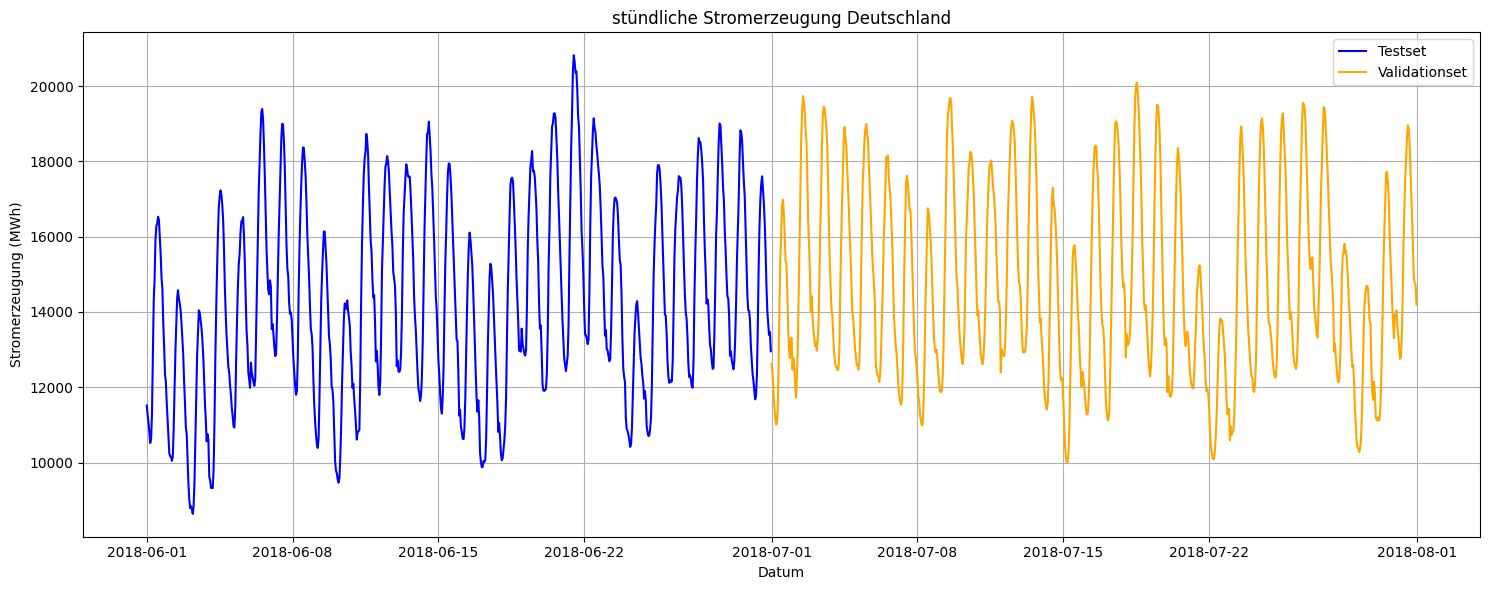

/kaggle/working/stromerzeugung_plot.png

In [10]:
#Graphische Darstellung des Datensatz, kleinerer Zeitraum. (verwendete Grafik 11 in Anhang)
import matplotlib.pyplot as plt
from IPython.display import FileLink, display
file_path = 'stromerzeugung_plot.png'  
# Auswahl der beiden Zeiträume
zeitraum1 = neu.loc['2018-06-01 00:00:00':'2018-06-30 23:00:00', 'Stromerzeugung Gesamt']
zeitraum2 = neu.loc['2018-07-01 00:00:00':'2018-07-31 23:00:00', 'Stromerzeugung Gesamt']

# Plot erstellen
plt.figure(figsize=(15, 6))
plt.plot(zeitraum1.index, zeitraum1.values, label='Testset', color='blue')         #Testset war ein schlechter Name... Trainingsset wäre klarer gewesen
plt.plot(zeitraum2.index, zeitraum2.values, label='Validationset', color='orange')
plt.title('stündliche Stromerzeugung Deutschland')
plt.xlabel('Datum')
plt.ylabel('Stromerzeugung (MWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(file_path)
plt.show()


display(FileLink(file_path)) #Zum Downloaden als PNG

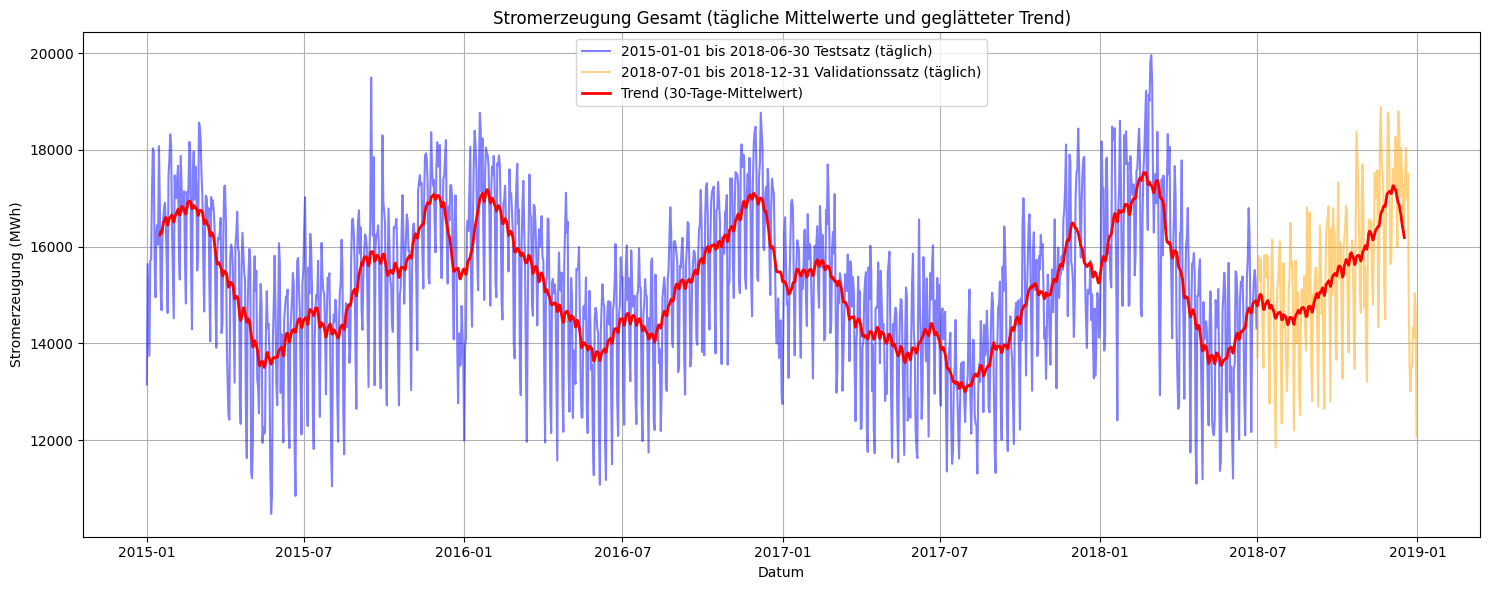

/kaggle/working/stromerzeugung_plot2.png

In [12]:
#Graphische Darstellung des Datensatz, kompletter Zeitraum. (verwendete Grafik 12 in Anhang)
#Mit täglichem Mittelwert der Stromerzeugung und Trendline 30Tage Mittelwert
import matplotlib.pyplot as plt
from IPython.display import FileLink, display

file_path = 'stromerzeugung_plot2.png'

# Tägliche Mittelwerte berechnen
zeitraum1_tag = neu.loc['2015-01-01 00:00:00':'2018-06-30 23:00:00', 'Stromerzeugung Gesamt'].resample('D').mean()
zeitraum2_tag = neu.loc['2018-07-01 00:00:00':'2018-12-31 23:00:00', 'Stromerzeugung Gesamt'].resample('D').mean()
zeitraum3_tag = neu.loc['2015-01-01 00:00:00':'2018-12-31 23:00:00', 'Stromerzeugung Gesamt'].resample('D').mean()
# Rollierender Mittelwert (z.B. 30 Tage)
trend1 = zeitraum3_tag.rolling(window=30, center=True).mean()


# Plot erstellen
plt.figure(figsize=(15, 6))
plt.plot(zeitraum1_tag.index, zeitraum1_tag.values, label='2015-01-01 bis 2018-06-30 Testsatz (täglich)', color='blue', alpha=0.5)          #Testsatz war ein schlechter Name... Trainingssatz wäre klarer gewesen
plt.plot(zeitraum2_tag.index, zeitraum2_tag.values, label='2018-07-01 bis 2018-12-31 Validationssatz (täglich)', color='orange', alpha=0.5)
plt.plot(trend1.index, trend1.values, label='Trend (30-Tage-Mittelwert)', color='red', linewidth=2)
#plt.plot(trend2.index, trend2.values,  color='red', linewidth=2)
plt.title('Stromerzeugung Gesamt (tägliche Mittelwerte und geglätteter Trend)')
plt.xlabel('Datum')
plt.ylabel('Stromerzeugung (MWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(file_path)
plt.show()

display(FileLink(file_path)) #Zum Downloaden als PNG

In [11]:
#Tabellarische Darstellung des Datensatz  (verwendete Grafik 13 in Anhang)

import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import FileLink, display

# Beispiel: Die ersten 10 Zeilen als Tabelle darstellen
df_head = neu.head(10)

fig, ax = plt.subplots(figsize=(10, 3))  # Größe anpassen
ax.axis('off')  # Achsen ausblenden
table = ax.table(
    cellText=df_head.values,
    colLabels=df_head.columns,
    rowLabels=df_head.index.strftime('%Y-%m-%d %H:%M'),  # falls DatetimeIndex
    loc='center',
    cellLoc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Größe der Zellen anpassen

plt.tight_layout()
plt.savefig('df_head.png', dpi=300, bbox_inches='tight')
plt.close()
display(FileLink('df_head.png')) #Zum Downloaden als PNG

/kaggle/working/df_head.png